## Data scale

### Goal of the notebook

- Once the 8 nodes features are computed, we have the following Panda dataset. <br>
However, **the data is not ready to be given to the GCN** because it is not scaled (values between `-1` and `1`) and because of it's distribution
- Therefore, a visualization of the nodes features will help us determine the best transformation to scale them.

💡 This notebook aim is to **read a Dataset file** and then **transform it into a scaled one**.

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd
import networkx as nx
from scipy import stats
import pickle
os.popen("export DGLBACKEND=pytorch")
#import dgl as dgl
import time
from sklearn import preprocessing

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import arange

In [2]:
# File to chose among the directory ./data/CAIDA_AS_RELATIONSHIP/

#FILE_PATH='./data/CAIDA_AS_RELATIONSHIP/20200101.as-rel2.txt'
FILE_PATH='./data/CAIDA_AS_RELATIONSHIP/20210301.as-rel2.txt'
suffix = FILE_PATH.split('/')[3].split('.')[0]

In [3]:
# Get the dataset to scale it
AS_dataset = pd.read_csv('data_GCN/dataset_v5_'+suffix+'.csv')

- #### Dataset not scaled, with 8 nodes-features

In [4]:
AS_dataset.head()

,ASN,source_label,label,page_rank_not_directed,page_rank_directed,page_rank_directed_inverse,degree_centrality,degree_normalized,ratio_peering,ratio_customer,ratio_provider
0,1,CAIDA_class,Transit/Access,0.000025,0.000082,0.000017,0.000196,14.0,2.0,2.0,10.0
1,2,CAIDA_class,Transit/Access,0.000034,0.000162,0.000004,0.000294,21.0,1.0,2.0,18.0
2,3,CAIDA_class,Transit/Access,0.000031,0.000067,0.000092,0.000280,20.0,5.0,1.0,14.0
3,4,CAIDA_class,Transit/Access,0.000028,0.000093,0.000004,0.000210,15.0,2.0,1.0,12.0
4,5,CAIDA_class,Enterprise,0.000016,0.000126,0.000004,0.000098,7.0,2.0,0.0,5.0


### Scaling of metrics node-features

The 4 nodes features that correspond to graph metrics are `page_rank_not_directed`, `page_rank_directed`, `page_rank_directed_inverse` et `degree_centrality`.

In [5]:
list_pageRank                  = AS_dataset['page_rank_not_directed']
list_pageRank_directed         = AS_dataset['page_rank_directed']
list_pageRank_directed_inverse = AS_dataset['page_rank_directed_inverse']
list_degreeCentrality          = AS_dataset['degree_centrality']
# EXECUTE THIS CELL ONLY 1 TIME TO HAVE IDEMPOTENCY BELOW

##### Scaling of  `page_rank_not_directed`

Distribution of page_rank_not_directed node-feature :

*********************************************
count    71434.000000
mean         0.000014
std          0.000106
min          0.000002
25%          0.000004
50%          0.000005
75%          0.000007
max          0.010813
Name: page_rank_not_directed, dtype: float64
*********************************************


Text(0, 0.5, '%')

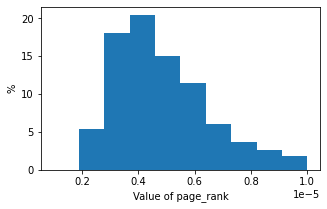

In [6]:
print("Distribution of page_rank_not_directed node-feature :")
print("\n*********************************************")
print(AS_dataset['page_rank_not_directed'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(list_pageRank, 
         range=(1e-6,1e-5), 
         weights=100*(np.ones(len(list_pageRank))/len(list_pageRank)))
plt.xlabel("Value of page_rank")
plt.ylabel("%")

In [7]:
AS_dataset['page_rank_not_directed'] = [element * 20000 if element * 20000 <= 1 else 1 for element in list_pageRank]

Distribution of scaled page_rank_not_directed node-feature :

*********************************************
count    71434.000000
mean         0.163160
std          0.195769
min          0.046870
25%          0.075614
50%          0.098458
75%          0.141052
max          1.000000
Name: page_rank_not_directed, dtype: float64
*********************************************


Text(0, 0.5, '%')

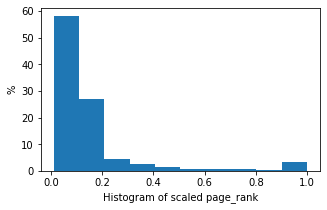

In [8]:
print("Distribution of " + "\033[1m" + "scaled" + "\033[0m" + " page_rank_not_directed node-feature :") 
print("\n*********************************************")
print(AS_dataset['page_rank_not_directed'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(AS_dataset['page_rank_not_directed'], 
         range=(1e-2,1e0), 
         weights=100*(np.ones(len(AS_dataset['page_rank_not_directed']))/len(AS_dataset['page_rank_not_directed'])))
plt.xlabel("Histogram of scaled page_rank")
plt.ylabel("%")

##### Scaling of  `page_rank_directed`

Distribution of page_rank_not_directed node-feature :

*********************************************
count    71434.000000
mean         0.000014
std          0.000066
min          0.000008
25%          0.000009
50%          0.000009
75%          0.000011
max          0.009921
Name: page_rank_directed, dtype: float64
*********************************************


Text(0, 0.5, '%')

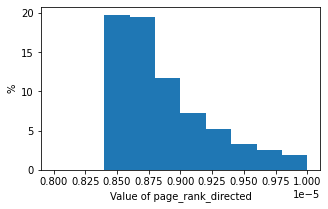

In [9]:
print("Distribution of page_rank_not_directed node-feature :")
print("\n*********************************************")
print(AS_dataset['page_rank_directed'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(list_pageRank_directed, 
         range=(8e-6,1e-5), 
         weights=100*(np.ones(len(list_pageRank_directed))/len(list_pageRank_directed)))
plt.xlabel("Value of page_rank_directed")
plt.ylabel("%")

In [10]:
AS_dataset['page_rank_directed'] = [element * 45000 if element * 45000 <=1 else 1 for element in list_pageRank_directed]

Distribution of scaled page_rank_directed node-feature :

*********************************************
count    71434.000000
mean         0.484493
std          0.172892
min          0.378938
25%          0.388982
50%          0.404204
75%          0.473491
max          1.000000
Name: page_rank_directed, dtype: float64
*********************************************


Text(0, 0.5, '%')

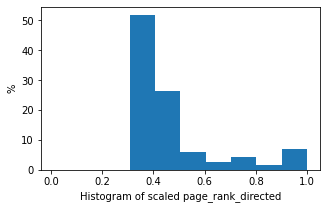

In [11]:
print("Distribution of " + "\033[1m" + "scaled" + "\033[0m" + " page_rank_directed node-feature :") 

print("\n*********************************************")
print(AS_dataset['page_rank_directed'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(AS_dataset['page_rank_directed'], 
         range=(1e-2,1e0), 
         weights=100*(np.ones(len(AS_dataset['page_rank_directed']))/len(AS_dataset['page_rank_directed'])))
plt.xlabel("Histogram of scaled page_rank_directed")
plt.ylabel("%")

##### Scaling of  `page_rank_directed_inverse`

Distribution of page_rank_directed_inverse node-feature :

*********************************************
count    71434.000000
mean         0.000014
std          0.000122
min          0.000002
25%          0.000002
50%          0.000002
75%          0.000002
max          0.010811
Name: page_rank_directed_inverse, dtype: float64
*********************************************


Text(0, 0.5, '%')

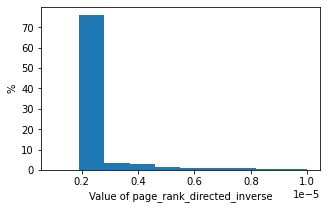

In [12]:
print("Distribution of page_rank_directed_inverse node-feature :")
print("\n*********************************************")
print(AS_dataset['page_rank_directed_inverse'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(list_pageRank_directed_inverse, 
         range=(1e-6,1e-5), 
         weights=100*(np.ones(len(list_pageRank_directed_inverse))/len(list_pageRank_directed_inverse)))
plt.xlabel("Value of page_rank_directed_inverse")
plt.ylabel("%")

In [13]:
AS_dataset['page_rank_directed_inverse'] = [element * 40000 if element * 40000 <=1 else 1 for element in list_pageRank_directed_inverse]

Distribution of scaled page_rank_directed_inverse node-feature :

*********************************************
count    71434.000000
mean         0.191827
std          0.260949
min          0.083994
25%          0.083994
50%          0.083994
75%          0.083994
max          1.000000
Name: page_rank_directed_inverse, dtype: float64
*********************************************


Text(0, 0.5, '%')

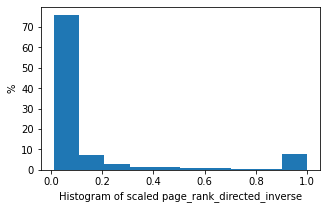

In [14]:
print("Distribution of " + "\033[1m" + "scaled" + "\033[0m" + " page_rank_directed_inverse node-feature :") 
print("\n*********************************************")
print(AS_dataset['page_rank_directed_inverse'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(AS_dataset['page_rank_directed_inverse'], 
         range=(1e-2,1e0), 
         weights=100*(np.ones(len(AS_dataset['page_rank_directed_inverse']))/len(AS_dataset['page_rank_directed_inverse'])))
plt.xlabel("Histogram of scaled page_rank_directed_inverse")
plt.ylabel("%")

##### Scaling of  `degree_centrality`

Distribution of degree_centrality node-feature :

*********************************************
count    71434.000000
mean         0.000192
std          0.001498
min          0.000014
25%          0.000014
50%          0.000028
75%          0.000042
max          0.127154
Name: degree_centrality, dtype: float64
*********************************************


Text(0, 0.5, '%')

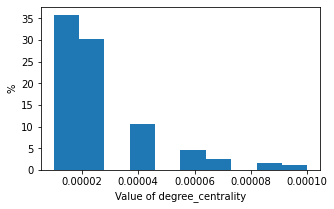

In [15]:
print("Distribution of degree_centrality node-feature :")
print("\n*********************************************")
print(AS_dataset['degree_centrality'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(list_degreeCentrality, 
         range=(1e-5,1e-4), 
         weights=100*(np.ones(len(list_degreeCentrality))/len(list_degreeCentrality)))
plt.xlabel("Value of degree_centrality")
plt.ylabel("%")

In [16]:
AS_dataset['degree_centrality'] = [element * 10000 if element * 10000 <=1 else 1 for element in list_degreeCentrality]

Distribution of scaled degree_centrality node-feature :

*********************************************
count    71434.000000
mean         0.382925
std          0.296410
min          0.139991
25%          0.139991
50%          0.279983
75%          0.419974
max          1.000000
Name: degree_centrality, dtype: float64
*********************************************


Text(0, 0.5, '%')

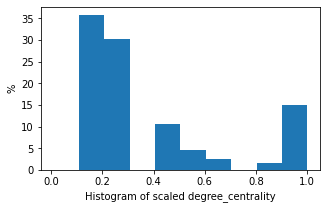

In [17]:
print("Distribution of " + "\033[1m" + "scaled" + "\033[0m" + " degree_centrality node-feature :") 
print("\n*********************************************")
print(AS_dataset['degree_centrality'].describe())
print("*********************************************")

plt.figure(figsize=(5,3))
plt.hist(AS_dataset['degree_centrality'], 
         range=(1e-2,1e0), 
         weights=100*(np.ones(len(AS_dataset['degree_centrality']))/len(AS_dataset['degree_centrality'])))
plt.xlabel("Histogram of scaled degree_centrality")
plt.ylabel("%")

### Scaling of non-metric features
The 4 other node features are `degree_normalized`, `ratio_peering`, `ratio_customer` and `ratio_provider`

##### Scaling of `degree_normalized` 

In [18]:
List_degree = AS_dataset['degree_normalized']
AS_dataset['degree_normalized'] = [np.log10(element) if np.log10(element)<=1 else 1 for element in List_degree]

Text(0, 0.5, '%')

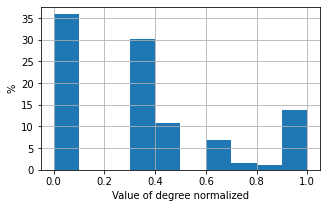

In [19]:
plt.figure(figsize=(5,3))
AS_dataset['degree_normalized'].hist(
    weights=100*(np.ones(len(AS_dataset['degree_normalized'])) /len(AS_dataset['degree_normalized'])))
plt.xlabel("Value of degree normalized")
plt.ylabel("%")

##### Scaling of `ratio_peering`, `ratio_customer` and `ratio_provider`

In [20]:
L1 = AS_dataset['ratio_peering']
L2 = AS_dataset['ratio_customer']
L3 = AS_dataset['ratio_provider']
# EXECUTE THIS CELL ONLY 1 TIME TO HAVE IDEMPOTENCY BELOW

In [21]:
AS_dataset['ratio_peering']  = [np.log(element+1)   if np.log(element+1)  <=1 else 1 for element in L1]
AS_dataset['ratio_customer'] = [np.log(element+1)   if np.log(element+1)  <=1 else 1 for element in L2]
AS_dataset['ratio_provider'] = [np.log10(element+1) if np.log10(element+1)<=1 else 1 for element in L3]

Text(0, 0.5, '%')

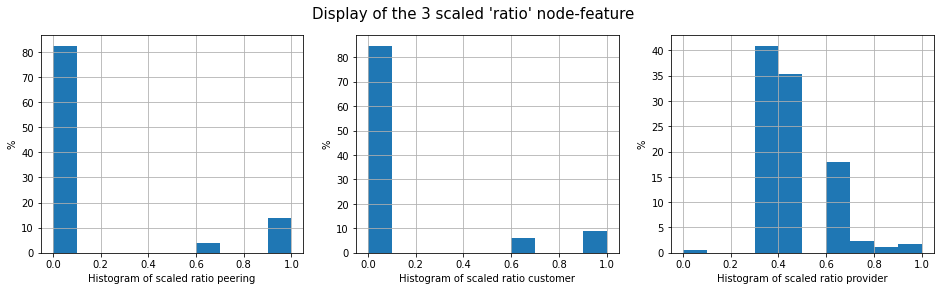

In [22]:
#############################
fig = plt.figure(figsize=(16,4))
fig.suptitle("Display of the 3 scaled 'ratio' node-feature", fontsize=15)

plt.subplot(1,3,1)
AS_dataset['ratio_peering'].hist(
    weights=100*(np.ones(len(AS_dataset['ratio_peering'])) /len(AS_dataset['ratio_peering'])))
plt.xlabel("Histogram of scaled ratio peering")
plt.ylabel("%")

plt.subplot(1,3,2)
AS_dataset['ratio_customer'].hist(
    weights=100*(np.ones(len(AS_dataset['ratio_customer'])) /len(AS_dataset['ratio_customer'])))
plt.xlabel("Histogram of scaled ratio customer")
plt.ylabel("%")

plt.subplot(1,3,3)
AS_dataset['ratio_provider'].hist(
    weights=100*(np.ones(len(AS_dataset['ratio_provider'])) /len(AS_dataset['ratio_provider'])))
plt.xlabel("Histogram of scaled ratio provider")
plt.ylabel("%")
#############################

In [27]:
print(str(AS_dataset['ratio_peering'].value_counts())  + "\n")
print(str(AS_dataset['ratio_customer'].value_counts()) + "\n")
print(str(AS_dataset['ratio_provider'].value_counts()) + "\n")

0.000000    58900
1.000000     9845
0.693147     2689
Name: ratio_peering, dtype: int64

0.000000    60531
1.000000     6474
0.693147     4429
Name: ratio_customer, dtype: int64

0.301030    29226
0.477121    25250
0.602060     9225
0.698970     3651
0.778151     1612
0.845098      787
1.000000      596
0.000000      425
0.903090      384
0.954243      278
Name: ratio_provider, dtype: int64



### Scaling of column `label`

We transform the **non ordinal category** `label` into 3 integers values:
 - *Content* ⇔ $0$
 - *Transit/Access* ⇔ $1$
 - *Enterprise* ⇔ $2$

In [28]:
AS_dataset['label'] = AS_dataset['label'].map({'Content': 0, 'Transit/Access': 1, 'Enterprise': 2})
AS_dataset.head()

,ASN,source_label,label,peering_link,customer_link,provider_link,page_rank_not_directed,page_rank_directed,page_rank_directed_inverse,degree_centrality,degree_normalized,ratio_peering,ratio_customer,ratio_provider
0,1,CAIDA_class,1,2.0,2.0,10.0,0.500388,1.0,0.675913,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,CAIDA_class,1,1.0,2.0,18.0,0.687322,1.0,0.169510,1.000000,1.000000,0.693147,1.000000,1.000000
2,3,CAIDA_class,1,5.0,1.0,14.0,0.623851,1.0,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000
3,4,CAIDA_class,1,2.0,1.0,12.0,0.569730,1.0,0.155139,1.000000,1.000000,1.000000,0.693147,1.000000
4,5,CAIDA_class,2,2.0,0.0,5.0,0.319572,1.0,0.142545,0.979939,0.845098,1.000000,0.000000,0.778151


### Exportation of scaled `dataset`

In [29]:
# Export the final scaled dataset that is ready for the GCN

suffix = FILE_PATH.split('/')[3].split('.')[0]

AS_dataset.to_csv('data_GCN/dataset_v5_'+suffix+'.csv', index=False)